# Community dynamics

I represent a community of groups as a matrix. Each cell represents a group and the cell entry is the number of its members. 
The aim is to simulate the evolution of the community and its groups under some natural dynamics. 
In several runs of the simulation I noticed that the shapes of the histograms depicted below remain approximately the same.
For the first histogram describing the initial state of the community this fact is not very surprising based on my simulation 
parameters. Moreover, the standard deviation also increases after the simulation run.

In [1]:
# Create a community of groups as a matrix
nRow <- 10
nCol <- 10
threshold <- 50 # if the number of members of a group exceeds the threshold then I call it large
randomData <- sample(x = c(0:threshold), size = nRow*nCol, replace = TRUE) # initial group size capped at threshold
myData <- rep(randomData, nRow*nCol)
myMatrix <- matrix(data = myData, nrow = nRow, ncol = nCol)

In [2]:
# Label groups as repeller,  neutral and attractor by -1, 0 and 1 respectively
att = 0.2 # fraction of attractors
rep = 0.1 # fraction of repellers
neutral = 1 - att - rep # fraction of neutral groups

attRep <- sample(x = c(-1, 0, 1), size = nRow*nCol, replace = TRUE, prob = c(rep, neutral, att)) # randomly label the groups
myAttRep <- rep(attRep, nRow*nCol)
myAttRepMatrix <- matrix(data = myAttRep, nrow = nRow, ncol = nCol)

# The propensity of the members to move is controlled by the type of the group (attractor, repeller or neutral)
attChoice <- c(-1, 0, 1, prob = c(0.1,0.8,0.1)) # high probability to stay in the group
repChoice <- c(-1, 0, 1, prob = c(0.4,0.2,0.4)) # high probability to move out of the group
neutralChoice <- c(-1, 0, 1, prob = c(0.25,0.5,0.25)) # balanced probabilities 

In [3]:
# Iteration - somes members of a group can leave their group and join a neighboring group or leave the community altogether
iteration <- function(matrix, attRepMatrix) {
  for (i in c(1:NROW(matrix))) {
    for (j in c(1:NCOL(matrix))) {
        if (attRepMatrix[i,j] == -1) {
            x <- sample(x = repChoice, 1, replace = TRUE)
            y <- sample(x = repChoice, 1, replace = TRUE)
        }
        if (attRepMatrix[i,j] == 1) {
            x <- sample(x = attChoice, 1, replace = TRUE)
            y <- sample(x = attChoice, 1, replace = TRUE)
        }
        if (attRepMatrix[i,j] == 0) {
            x <- sample(x = neutralChoice, 1, replace = TRUE)
            y <- sample(x = neutralChoice, 1, replace = TRUE)
        }
        n_movers <- sample(x = c(0:matrix[i,j]), size = 1)
        if ((i+x) >= 1 # x-coordinate lower bound check
            & (i+x) <= NROW(matrix) # x-coordinate upper bound check
            & (j+y) >= 1 # y-coordinate lower bound check
            & (j+y) <= NCOL(matrix)) { # y-coordinate upper bound check
            matrix[i,j] <- matrix[i,j] - n_movers # leave the current group
            matrix[i+x,j+y] <- matrix[i+x,j+y] + n_movers # join the neighboring group
        }
        else matrix[i,j] <- matrix[i,j] - n_movers # leave the community altogether
    }
  }
  return(matrix)
}

In [4]:
# Number of iterations
n_trials <- 1000

# The dynamics represents the growth (birth or immigration) and the contraction (death or emigration) of the community members
dynamics <- c(-10:12) # slightly skewed toward growth

In [5]:
# Simulation - run the iteration for a certain number of times
simulation <- function(n_trials, matrix, attRepMatrix) {
    for (i in c(1:n_trials)) {
        randomDynamics <- sample(x = dynamics, size = nRow*nCol, replace = TRUE)
        dynamicsMatrix <- matrix(data = randomDynamics, nrow = nRow, ncol = nCol)
        intermediateMatrix <- matrix + dynamicsMatrix # add dynamics due to birth, death, immigration, emigration, etc.
        intermediateMatrix[intermediateMatrix < 0] <- 0 # ensure that there is no negative group membership
        simulatedMatrix <- iteration(matrix = intermediateMatrix, attRepMatrix = attRepMatrix)
        }
    return(simulatedMatrix)
}

      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   46    1   36   26   28   23    3   38    4    15
 [2,]   30   46   50   29    9   42   23    2    8    35
 [3,]    8   48   49   25   18   27    5    1   42     2
 [4,]   31   36   42   23    1   21   37    1   28    30
 [5,]   32   20   21   43    2   16   38   31   23     6
 [6,]    0   31   23   42    2    6    6   25   34    42
 [7,]   17   44   50   48   35   26    5   28   35     1
 [8,]   37   27   13   45   38   49   20   50   28    37
 [9,]   49   40   37   30   39   49   43    1   29    26
[10,]   10   42   35   16   12   44   37   14   28    47
[1] "No. of empty groups before simulation =  1"
[1] "No. of large groups before simulation =  3"
[1] "No. of community members before simulation =  2673"
[1] "Standard deviation before simulation =  15.4"


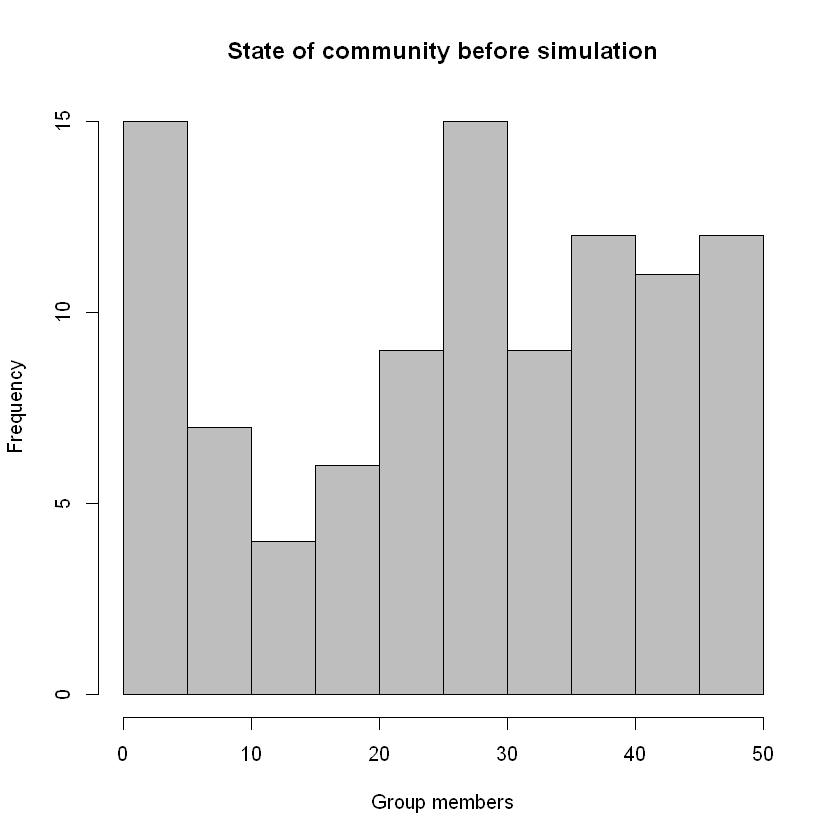

In [6]:
# Print the initial state of the community
print(myMatrix)
print(paste("No. of empty groups before simulation = ", sum(myMatrix == 0)))
print(paste("No. of large groups before simulation = ", sum(myMatrix >= threshold)))
print(paste("No. of community members before simulation = ", sum(myMatrix)))
print(paste("Standard deviation before simulation = ", round(sd(myMatrix), 2)))
hist(myMatrix, col = "gray", xlab = "Group members", breaks = 10, main = "State of community before simulation")

In [7]:
# Print the matrix of attractors, repellers and neutral groups
myAttRepMatrix

0,-1,-1,0,0,0,0,0,0,0
-1,0,0,0,0,0,1,-1,0,1
0,-1,1,1,0,0,0,-1,0,0
1,0,0,-1,-1,0,0,0,0,0
0,1,0,0,-1,0,0,0,0,-1
-1,0,0,-1,0,1,0,0,1,-1
0,0,1,1,0,0,0,0,0,0
0,0,0,0,0,1,0,1,0,0
0,0,0,0,0,1,0,0,0,0
0,0,0,-1,0,1,1,0,-1,-1


      [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10]
 [1,]   44    0   26   18   23   13    4   34    0     2
 [2,]   26   90   77   19    0   27   29    6   11    16
 [3,]    5   21   54    7   60   16    0    0   44     0
 [4,]    1   65   19   21    0   43    9    3   24     8
 [5,]   13    3   96   34    7   22    8   69   13    28
 [6,]    0   34   23    5   13    0    0    7   31    33
 [7,]   27    5   58   76   54   16   31   25   27     5
 [8,]  100    3   21   27   37   13    2   73   24     0
 [9,]   16   43   36   42   38   98   46    5   38    33
[10,]    2   11   47    1    8   23   27   18   21    23
[1] "No. of empty groups after simulation =  11"
[1] "No. of large groups after simulation =  13"
[1] "No. of community members after simulation =  2504"
[1] "Standard deviation after simulation =  23.93"


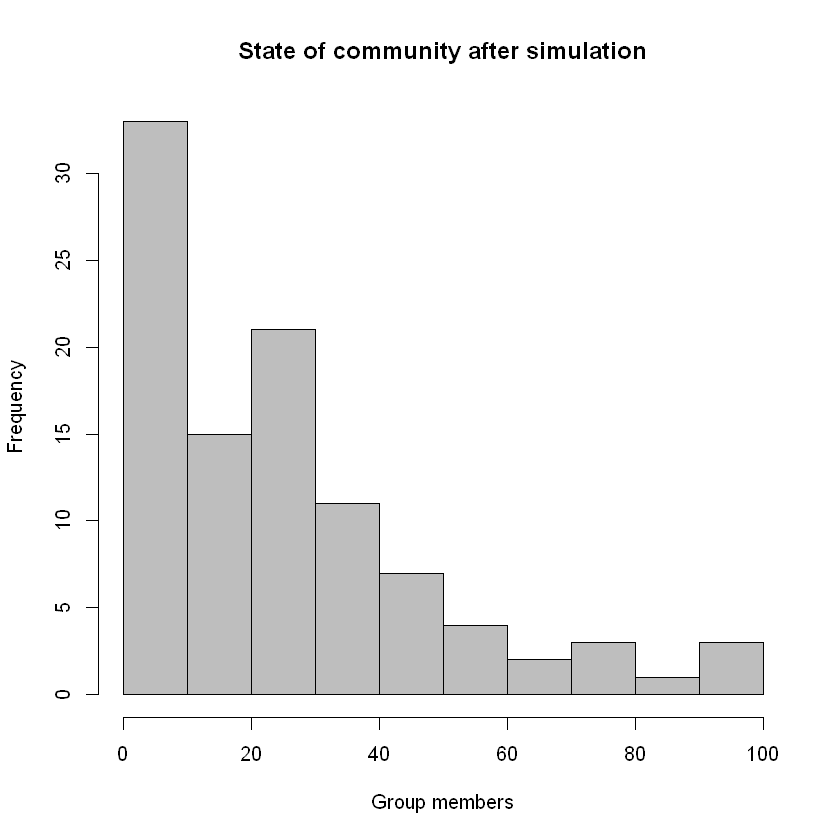

In [8]:
# Run the simulation and print the changed state of the community
newMyMatrix <- simulation(n_trials = n_trials, matrix = myMatrix, attRepMatrix = myAttRepMatrix)

print(newMyMatrix)
print(paste("No. of empty groups after simulation = ", sum(newMyMatrix == 0)))
print(paste("No. of large groups after simulation = ", sum(newMyMatrix >= threshold)))
print(paste("No. of community members after simulation = ", sum(newMyMatrix)))
print(paste("Standard deviation after simulation = ", round(sd(newMyMatrix), 2)))
hist(newMyMatrix, col = "gray", xlab = "Group members", breaks = 10, main = "State of community after simulation")